In [2]:
from tsai.basics import *

X, y, splits = get_regression_data('AppliancesEnergy', split_data=False)

119it [00:02, 40.37it/s]
66it [00:01, 53.77it/s] 


In [21]:
len(X[0][0])

144

arch: TSTPlus(c_in=24 c_out=1 seq_len=144 arch_config={} kwargs={})


epoch,train_loss,valid_loss,_rmse,time
0,226.212646,205.591568,14.338465,00:00
1,215.675705,205.328262,14.329280,00:00
2,214.045883,204.969543,14.316757,00:00
3,213.724442,204.455826,14.298805,00:00
4,213.332962,203.780228,14.275161,00:00
5,212.347076,202.945450,14.245893,00:00
6,208.604645,201.968185,14.211553,00:00
7,205.550964,200.865952,14.172719,00:00
8,200.309616,199.645828,14.129608,00:00
9,194.714035,198.325378,14.082805,00:00


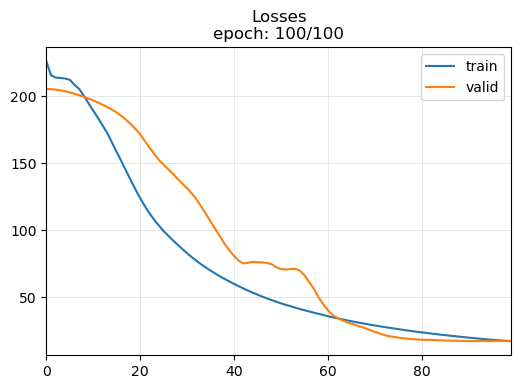

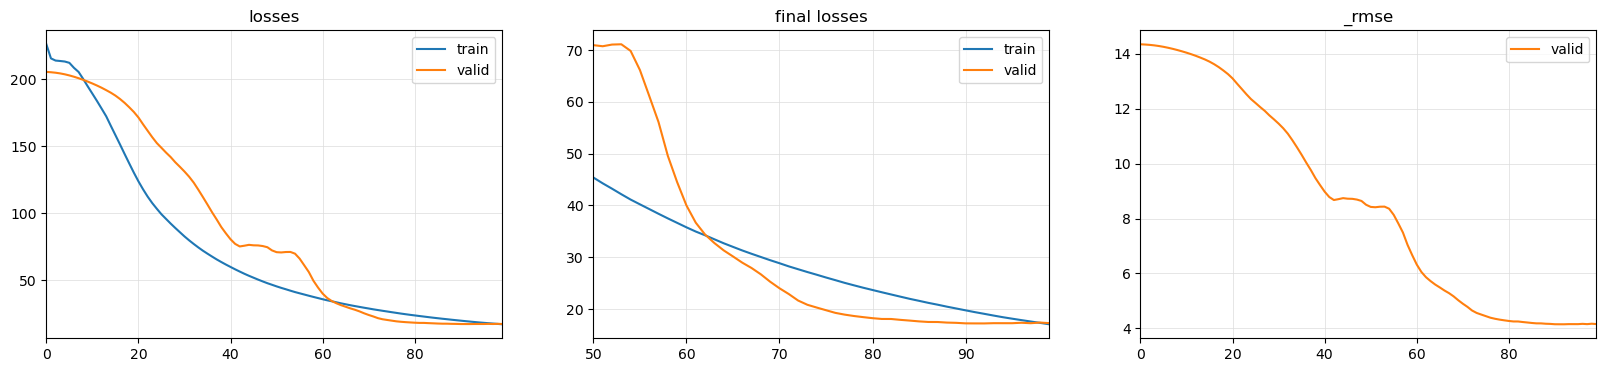

In [18]:
tfms = [None, TSRegression()]
batch_tfms = TSStandardize(by_sample=True)
reg = TSRegressor(X, y, splits=splits, path='models', arch="TSTPlus", tfms=tfms, batch_tfms=batch_tfms, metrics=rmse, cbs=ShowGraph(), verbose=True)
reg.fit_one_cycle(100, 3e-4)
reg.export("reg.pkl")

In [22]:
X, y, splits = get_classification_data('LSST', split_data=False)

In [29]:
len(X[10])

6

In [30]:
import torch
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.nn as nn

# Define your model
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMRegressor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, lengths):
        # Packing input sequence ...
        packed_input = pack_padded_sequence(x, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_output, _ = self.lstm(packed_input)
        output, _ = pad_packed_sequence(packed_output, batch_first=True)
        # Decode the hidden state of the last time step
        out = self.fc(output[:, -1, :])
        return out

# Hard-coded parameters for example
input_size = 10  # for example, let's assume each item in a sequence has 10 features
hidden_size = 128  # size of the hidden layer in LSTM
output_size = 1  # we are dealing with a regression problem, so output size is 1
num_layers = 1  # number of LSTM layers

# instantiate the model
model = LSTMRegressor(input_size, hidden_size, output_size, num_layers)
model = model.cuda()

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Simulating variable-length sequences
seq_lengths = torch.LongTensor([10, 6, 8])  # example of length of sequences in a batch
max_seq_length = seq_lengths.max().item()

# Generate random tensor of sequences
data = torch.randn(3, max_seq_length, input_size)
target = torch.randn(3, output_size)

seq_lengths, perm_idx = seq_lengths.sort(0, descending=True)
data = data[perm_idx]
target = target[perm_idx]

In [35]:
len(data[2])

10